## Project:- Perform Exploratory Data Analysis on Netflix shows dataset

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


### 1.Top 10 Countries with most and least number no.of TV shows and Movies

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [44]:
#top_countries_df=df.title.groupby(['type','country']).count()


In [29]:
#top_countries_df=top_countries_df[('Movie')].sort_values(ascending=False)


In [45]:
#top_contries_df.count().sort_values('country',ascending=False)

In [40]:
query1 = df.title.groupby([df.type,df.country]).count()

<AxesSubplot:title={'center':'Top 10 Countries with most no.of movies'}, ylabel='country'>

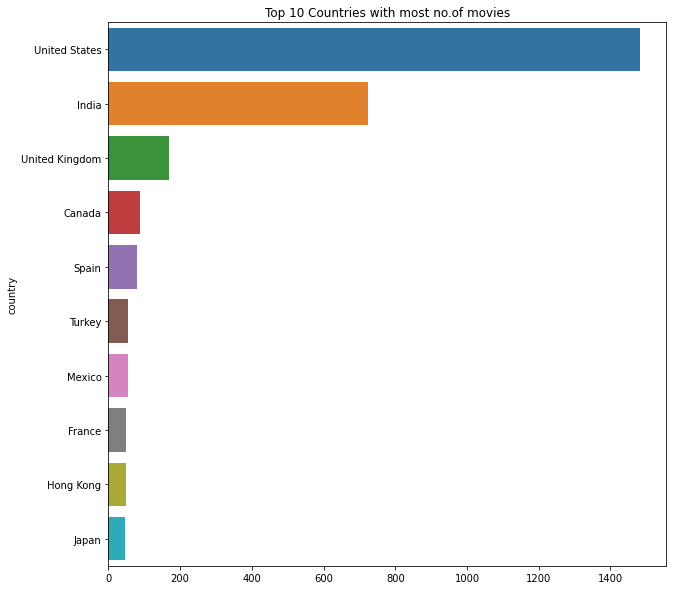

In [41]:
sub_query1 = query1[('Movie',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 Countries with most no.of movies')
sns.barplot(y = sub_query1.index,x = sub_query1.values)

most no of tv shows

In [51]:
top_tvshows=query1[('TV Show',)].sort_values(ascending=False)[:10]

In [52]:
top_tvshows

country
United States     550
United Kingdom    178
Japan             129
South Korea       104
Taiwan             65
Canada             53
India              53
France             40
Australia          39
Spain              37
Name: title, dtype: int64

<AxesSubplot:ylabel='country'>

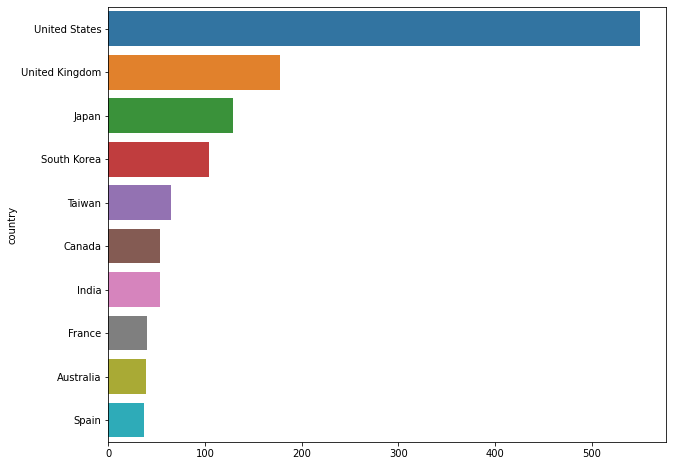

In [58]:
plt.figure(figsize=(10,8))
sns.barplot(y=top_tvshows.index,x=top_tvshows.values)

top countries with least number of tv shows

In [66]:
least_tvshows=query1[('TV Show',)].sort_values(ascending=True)[:10]

In [67]:
least_tvshows

country
Mauritius, South Africa                        1
United Arab Emirates                           1
Turkey, Azerbaijan                             1
Switzerland                                    1
Spain, United Kingdom                          1
Spain, Cuba                                    1
South Korea, France                            1
South Korea, Canada, United States, China      1
Singapore, United States                       1
Saudi Arabia, Syria, Egypt, Lebanon, Kuwait    1
Name: title, dtype: int64

<AxesSubplot:ylabel='country'>

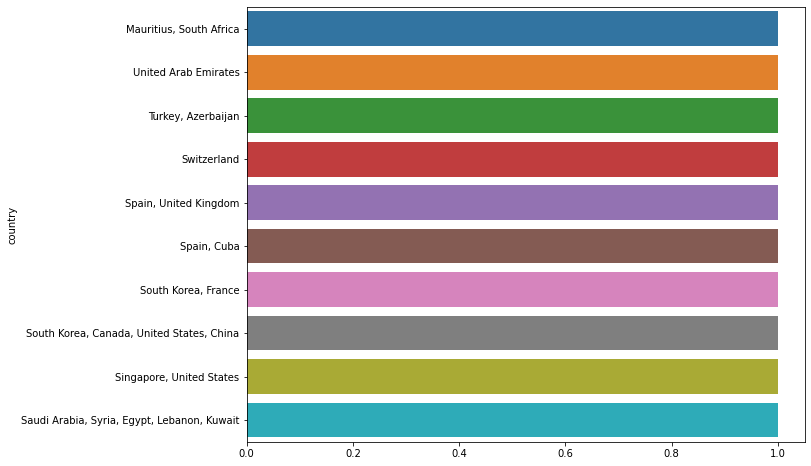

In [68]:
plt.figure(figsize=(10,8))
sns.barplot(x=least_tvshows.values,y=least_tvshows.index)

### TV Shows with more number of seasons

In [79]:
df.groupby('type').count()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
type,,,,,,,,,,,
Movie,4265,4265,4137,3905,4070,4264,4265,4257,4265,4265,4265
TV Show,1969,1969,128,1759,1688,1959,1969,1967,1969,1969,1969


In [86]:
cond=df[['duration']].apply(lambda x:x.str.contains('Season|Seasons',regex=True)).any(axis=1)

In [87]:
cond

0       False
1       False
2        True
3        True
4       False
        ...  
6229     True
6230     True
6231    False
6232     True
6233     True
Length: 6234, dtype: bool

In [88]:
no_of_seasons=df[cond]

In [92]:
no_of_seasons.index=np.arange(len(no_of_seasons

In [96]:
query2 = df[cond]
query2.index = np.arange(len(query2))
query2['season']=query2.duration.str[:2]
list1 = list(query2['season'])
for i in range(len(list1)):
    list1[i] = int(list1[i])
query2['season'] = list1

c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Text(0.5, 1.0, 'Tv shows no.of seaso)ns Distributions')

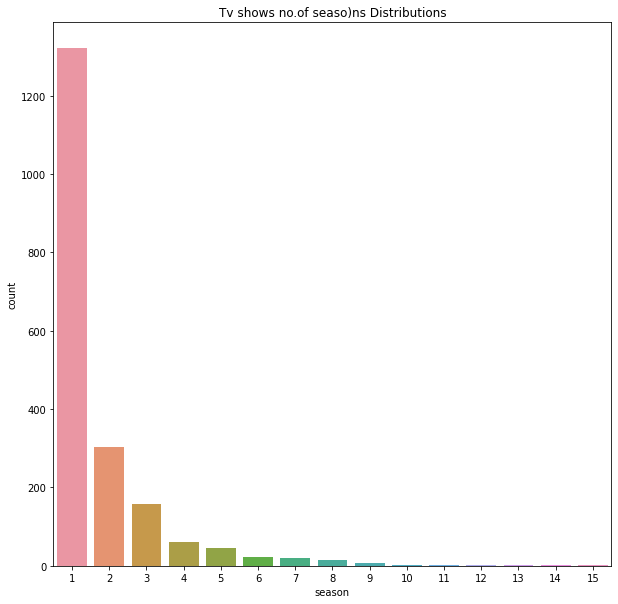

In [100]:
plt.figure(figsize=(10,10))
sns.countplot(x=query2.season)
plt.title('Tv shows no.of seaso)ns Distributions')

In [106]:
no_of_seasons=query2.season.groupby(query2.title).sum().sort_values(ascending=False)

Text(0.5, 1.0, 'TV Shows with more no.of seasons')

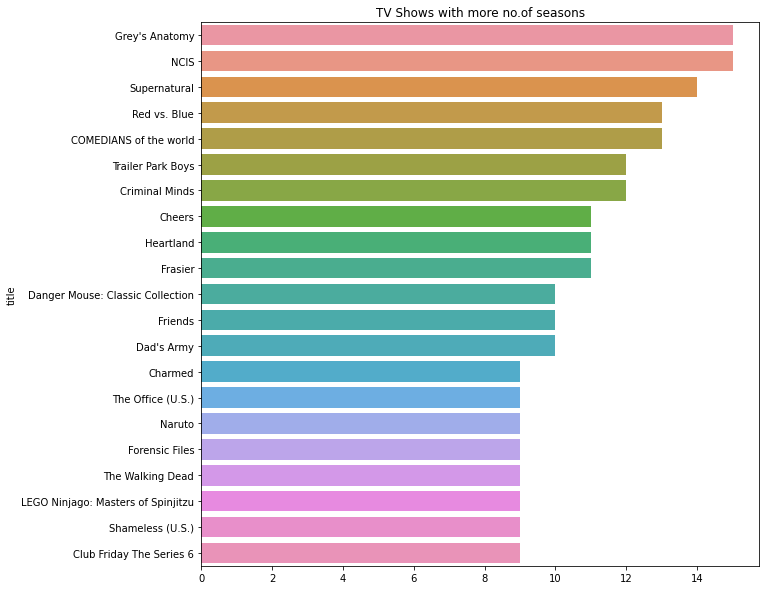

In [113]:
sub_query5 =query2.season.groupby(query2.title).sum().sort_values(ascending = False)
plt.figure(figsize =(10,10))
sns.barplot(y=sub_query5[sub_query5>=9].index,x = sub_query5[sub_query5>=9].values)
plt.title('TV Shows with more no.of seasons')

Text(0.5, 1.0, 'TV Shows with more no.of seasons')

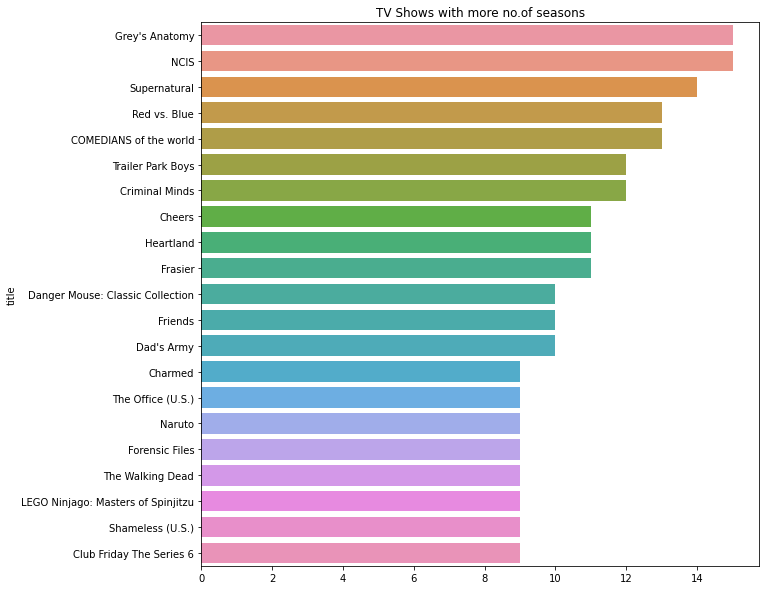

In [114]:
sub_query5 =query2.season.groupby(query2.title).sum().sort_values(ascending = False)
plt.figure(figsize =(10,10))
sns.barplot(y=sub_query5[sub_query5>=9].index,x = sub_query5[sub_query5>=9].values)
plt.title('TV Shows with more no.of seasons')

### Top 10 years with most number of movies and series

In [120]:
print(df['title'].unique())

['Norm of the North: King Sized Adventure' 'Jandino: Whatever it Takes'
 'Transformers Prime' ... 'Maron'
 "A Young Doctor's Notebook and Other Stories" 'Friends']


In [140]:
top10_years=df['title'].groupby([df.type,df.release_year]).count()

In [141]:
top10_years=top10_years[('Movie')].sort_values(ascending=False)[:10]

In [143]:
#top10_years[('Movie')]
top10_years

release_year
2017    682
2018    646
2016    593
2019    400
2015    363
2014    213
2013    177
2012    125
2010    111
2011    100
Name: title, dtype: int64

Text(0.5, 1.0, 'Top 10 years with most no.of movies')

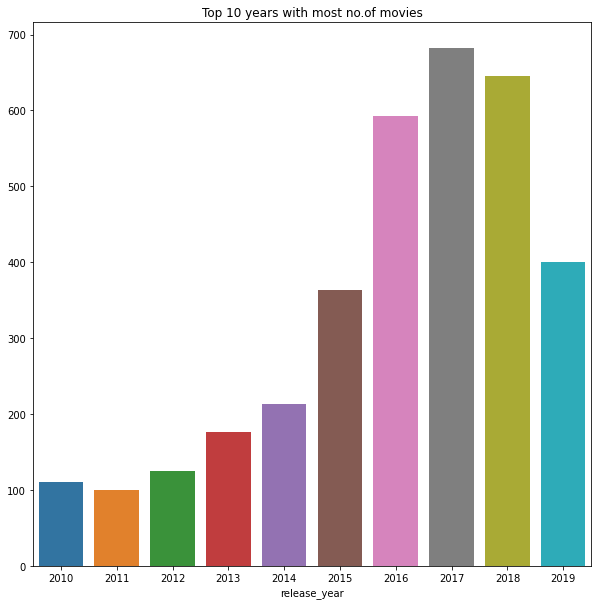

In [148]:
query4 = df.title.groupby([df.type,df.release_year]).count()
sub_query6 = query4[('Movie',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
sns.barplot(x = sub_query6.index,y = sub_query6.values)
plt.title('Top 10 years with most no.of movies')

Text(0.5, 1.0, 'Top 10 years with most no.of TV Shows')

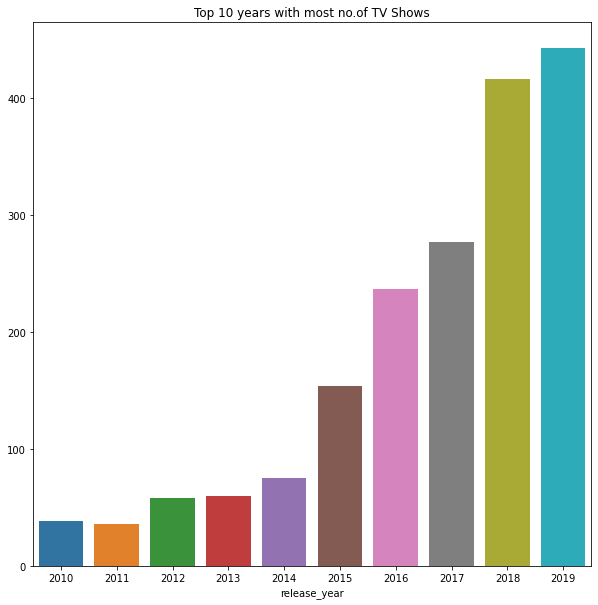

In [149]:
sub_query7 = query4[('TV Show',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
sns.barplot(x = sub_query7.index,y = sub_query7.values)
plt.title('Top 10 years with most no.of TV Shows')

### Top 10 country with most number of movies and series realeased on the most no. of movies and series released year

In [154]:
most_movie_year=df.title.groupby([df.type,df.release_year,df.country]).count()

In [161]:
sub_query=most_movie_year[('Movie',2019)].sort_values(ascending=False)[:10]

Text(0.5, 1.0, 'Top 10 county with most no. of movies released on the most no. of movies released year')

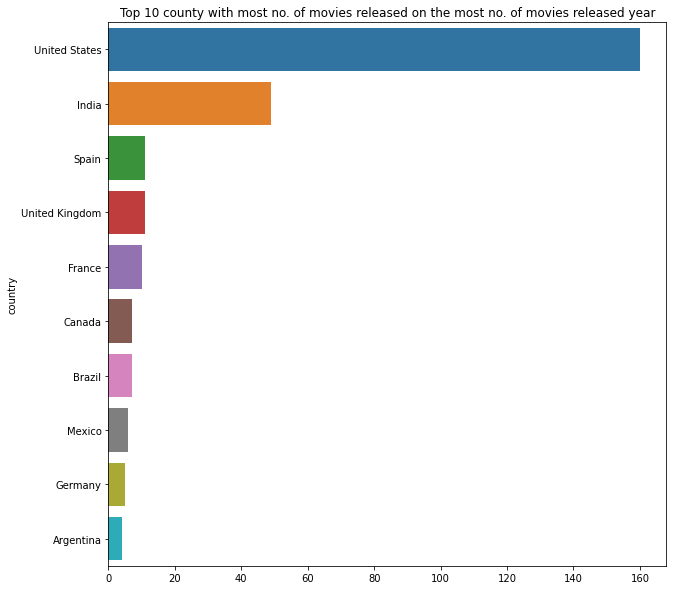

In [162]:
plt.figure(figsize=(10,10))
sns.barplot(y=sub_query.index,x=sub_query.values)
plt.title('Top 10 county with most no. of movies released on the most no. of movies released year')

In [163]:
most_tvshows=most_movie_year[('TV Show',2019)].sort_values(ascending=False)[:10]

Text(0.5, 1.0, 'Top 10 country with most no. of TV Shows releted on the most no. of series released year')

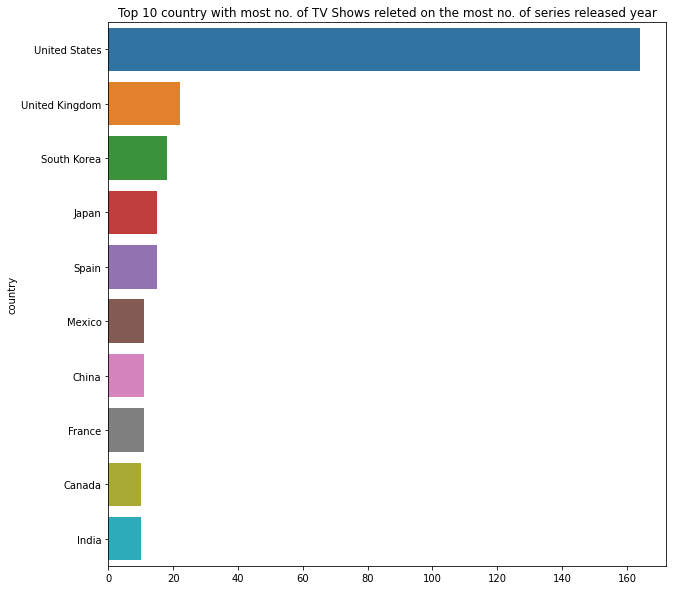

In [168]:
plt.figure(figsize=(10,10))
sns.barplot(y=most_tvshows.index,x=most_tvshows.values)
plt.title('Top 10 country with most no. of TV Shows releted on the most no. of series released year')

## Director with most number f movies and series

In [170]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [185]:
most_director=df.title.groupby(df.director).count().sort_values(ascending=False)

In [186]:
most_director

director
Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Martin Scorsese            9
                          ..
Manav Shah                 1
Syed Ahmad Afzal           1
Mamat Khalid               1
Malik Vitthal              1
Kevin Phillips             1
Name: title, Length: 3301, dtype: int64

In [210]:
query6=df[~cond]
query6.index=np.arange(len(query6))

In [215]:
sub_query7=query6.title.groupby(df.director).count().sort_values(ascending=False)[:10]

sub_query7

director
Raúl Campos, Jan Suter    15
Jay Karas                 10
Steven Spielberg           8
Marcus Raboy               8
David Dhawan               8
Hakan Algül                7
Martin Scorsese            7
Cathy Garcia-Molina        7
Shannon Hartman            6
Kunle Afolayan             6
Name: title, dtype: int64

Text(0.5, 1.0, 'Director with most number of movies')

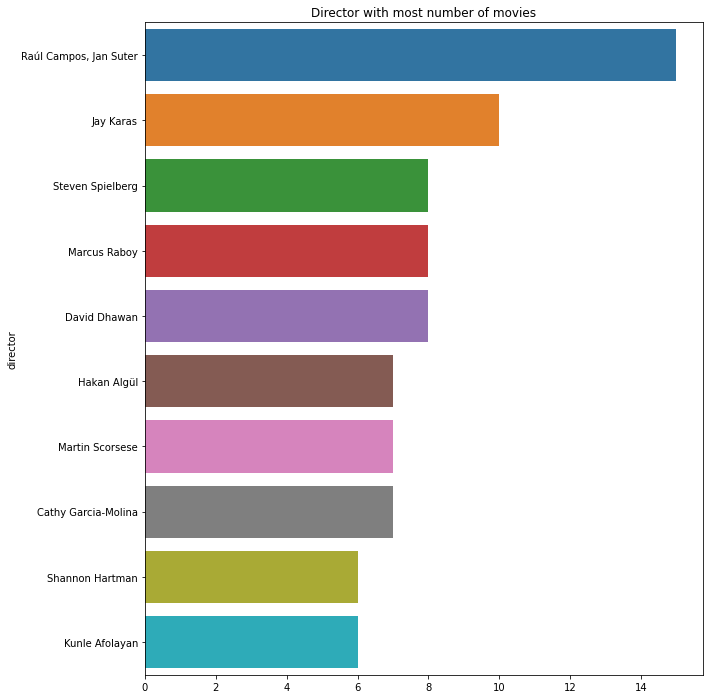

In [216]:
plt.figure(figsize=(10,12))
sns.barplot(y=sub_query7.index,x=sub_query7.values)
plt.title('Director with most number of movies')

In [219]:
query7=df[cond]
query7.index=np.arange(len(query7))
sub_query7=query7.director.value_counts()[:10]
sub_query7

Alastair Fothergill                     3
Ken Burns                               2
Stan Lathan                             2
Shin Won-ho                             2
Rob Seidenglanz                         2
Iginio Straffi                          2
Chang-Min Lee                           1
Neslihan Yesilyurt                      1
Vikramaditya Motwane, Anurag Kashyap    1
Elías León                              1
Name: director, dtype: int64

Text(0.5, 1.0, 'Director with most number of Tv Shows')

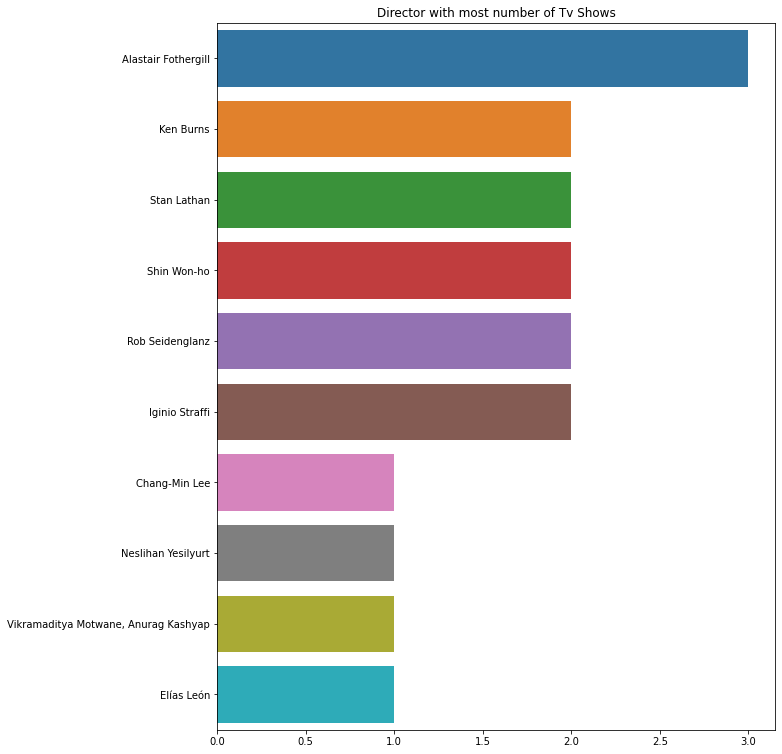

In [221]:
plt.figure(figsize=(10,13))
sns.barplot(y=sub_query7.index,x=sub_query7.values)
plt.title('Director with most number of Tv Shows')

### Category and Rating

In [229]:
df.rating.value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

<AxesSubplot:>

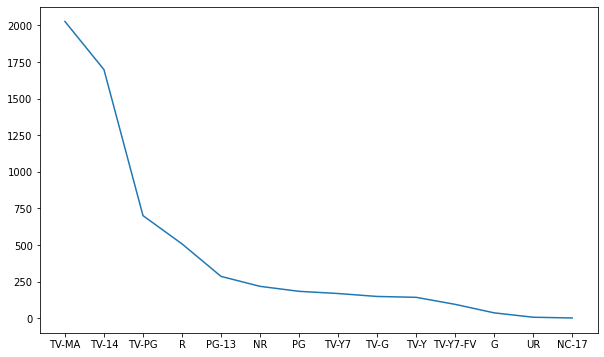

In [231]:
#sns.countplot(x=ratings)
plt.figure(figsize=(10,6))
sns.lineplot(x=df.rating.value_counts().index,y=df.rating.value_counts().values)

### Top 10 Directors having most no. of movies and Tv Shows grouped by rating

In [243]:
query9=df[~cond]

In [244]:
query9.title.groupby([query9['director'],query9['rating']]).count().sort_values(ascending=False)[:10]

director                rating
Raúl Campos, Jan Suter  TV-MA     17
Jay Chapman             TV-MA     10
Marcus Raboy            TV-MA     10
Jay Karas               TV-MA      8
Martin Scorsese         R          7
Robert Rodriguez        PG         6
Quentin Tarantino       R          6
Lance Bangs             TV-MA      6
Steven Spielberg        PG-13      5
Kunle Afolayan          TV-14      5
Name: title, dtype: int64

Text(0.5, 1.0, 'Top 10 Directors having most no.of movies grouped by rating')

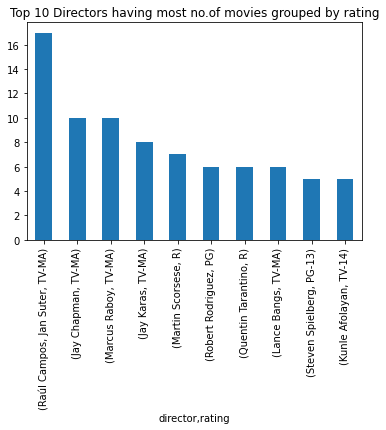

In [247]:
query9.title.groupby([query9['director'],query9['rating']]).count().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 Directors having most no.of movies grouped by rating')

Text(0.5, 1.0, 'Top 10 Directors having most no.of TV Shows grouped by category')

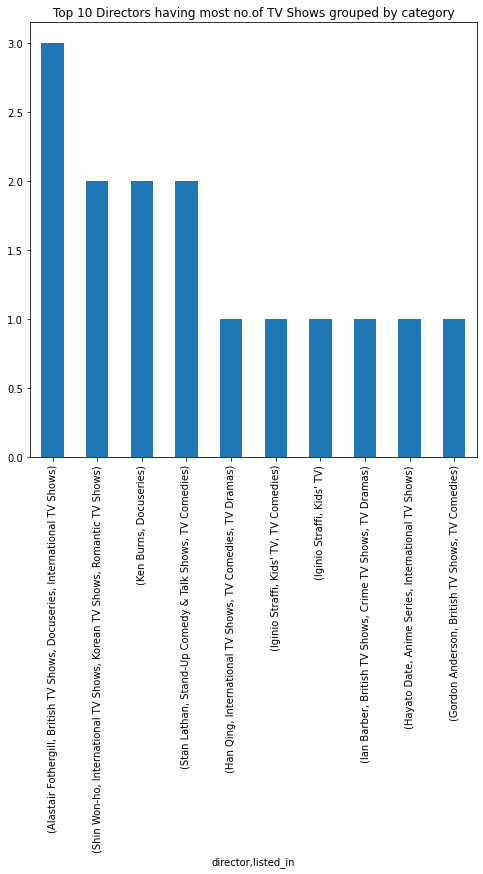

In [251]:
plt.figure(figsize=(8,8))
query12 = df[cond]
query12.title.groupby([query12['director'],query12['listed_in']]).count().sort_values(ascending =False)[:10].plot(kind='bar')
#sns.barplot(y = query12.index,x = query12.values)
plt.title('Top 10 Directors having most no.of TV Shows grouped by category')